In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
from sklearn import preprocessing 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
data=pd.read_csv(r"E:\15TH SMSTR\Thesis CSE497\thesis work\data set\Train_data.csv")

In [3]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
data.shape

(25192, 42)

In [5]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [6]:
data['class'].unique()

array(['normal', 'anomaly'], dtype=object)

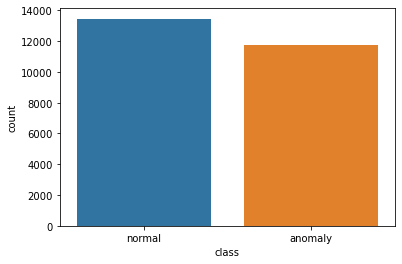

In [7]:
sns.countplot('class',data=data)

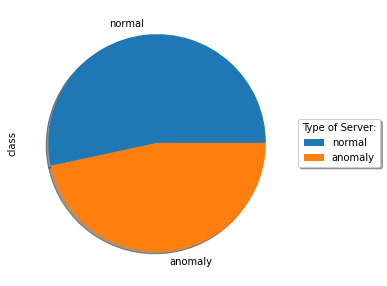

In [8]:
data['class'].value_counts().plot(kind='pie',figsize=(8,5),shadow=True)
plt.legend(title = "Type of Server:",loc='center left',bbox_to_anchor=(1, 0, 0.5, 1),shadow=True)

In [9]:
data['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

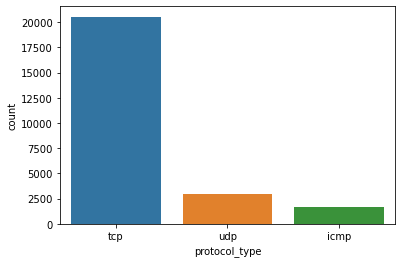

In [10]:
sns.countplot('protocol_type',data=data)

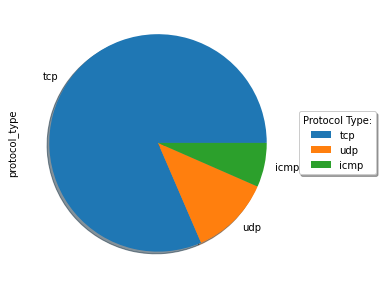

In [11]:
data['protocol_type'].value_counts().plot(kind='pie',figsize=(8,5),shadow=True)
plt.legend(title = "Protocol Type:",loc='center left',bbox_to_anchor=(1, 0, 0.5, 1),shadow=True)

In [12]:
data['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [13]:
#data['protocol_type'].unique()
label_encoder = preprocessing.LabelEncoder()
data['protocol_type']= label_encoder.fit_transform(data['protocol_type'])
data['protocol_type'].unique()

array([1, 2, 0])

In [14]:
data['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001'], dtype=object)

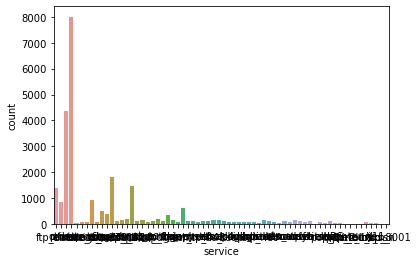

In [15]:
sns.countplot('service',data=data)

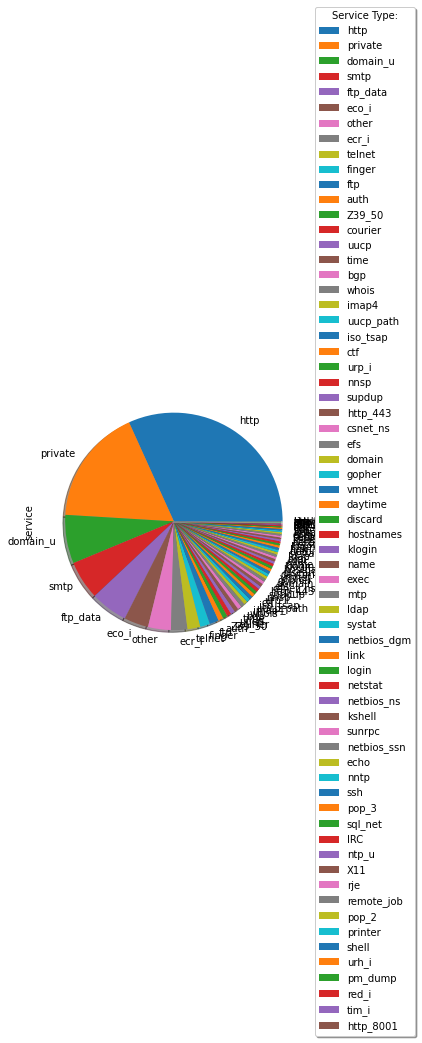

In [16]:
data['service'].value_counts().plot(kind='pie',figsize=(8,5),shadow=True)
plt.legend(title = "Service Type:",loc='center left',bbox_to_anchor=(1, 0, 0.5, 1),shadow=True)

In [17]:
#data['service'].unique()
label_encoder = preprocessing.LabelEncoder()
data['service']= label_encoder.fit_transform(data['service'])
data['service'].unique()

array([19, 41, 46, 22, 48, 33, 35, 13, 32, 57, 17, 11, 55, 63,  2, 51,  6,
       62, 34, 61,  3, 10, 18,  4, 29, 14, 20, 64, 56, 23, 15, 65, 25, 26,
       12, 27, 30, 54, 31, 28, 52, 59, 21, 16, 40,  9, 39,  5,  7, 53,  8,
       50, 37, 44, 38,  0, 43, 45, 58, 42, 47, 36, 49,  1, 60, 24])

In [18]:
data['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

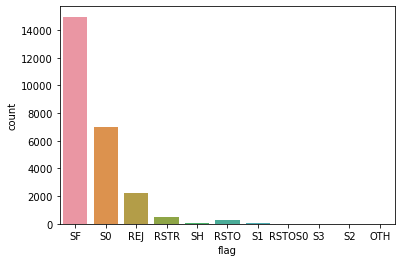

In [19]:
sns.countplot('flag',data=data)

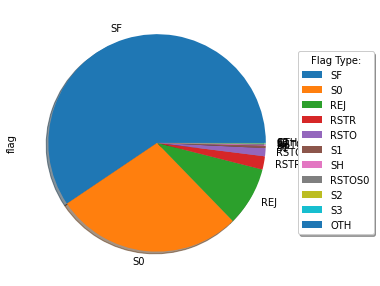

In [20]:
data['flag'].value_counts().plot(kind='pie',figsize=(8,5),shadow=True)
plt.legend(title = "Flag Type:",loc='center left',bbox_to_anchor=(1, 0, 0.5, 1),shadow=True)

In [21]:
label_encoder = preprocessing.LabelEncoder()
data['flag']= label_encoder.fit_transform(data['flag'])
data['flag'].unique()

array([ 9,  5,  1,  4, 10,  2,  6,  3,  8,  7,  0])

In [22]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [23]:
features = data.columns
# display
#features

In [24]:
features = [x for x in features if x != 'class']
#features

In [25]:
data.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.036421,0.101301,-0.066634,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,...,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435
protocol_type,0.036421,1.000000,0.025322,0.094926,-0.001286,-0.004734,-0.001123,0.176420,-0.000794,-0.011589,...,0.238318,0.104292,0.004797,0.131609,-0.206137,-0.360518,-0.080432,-0.079086,-0.018424,-0.047182
service,0.101301,0.025322,1.000000,-0.295491,0.008554,-0.013782,-0.006896,0.088169,0.011325,-0.056165,...,0.184684,-0.409442,-0.450546,0.280962,-0.101749,-0.153359,0.276906,0.273472,0.141211,0.142865
flag,-0.066634,0.094926,-0.295491,1.000000,-0.006599,0.027606,-0.006593,0.068693,0.004744,0.067027,...,-0.319355,0.584087,0.634415,-0.284016,0.194528,0.078870,-0.447140,-0.447007,-0.680849,-0.716075
src_bytes,0.084864,-0.001286,0.008554,-0.006599,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,...,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190
dst_bytes,0.013258,-0.004734,-0.013782,0.027606,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,...,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803
land,-0.001012,-0.001123,-0.006896,-0.006593,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,...,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335
wrong_fragment,-0.010358,0.176420,0.088169,0.068693,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,...,0.040020,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143
urgent,-0.000486,-0.000794,0.011325,0.004744,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,...,0.004612,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358
hot,0.004202,-0.011589,-0.056165,0.067027,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,...,-0.009083,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719


# Desicion Tree

In [27]:
#dt = tree.DecisionTreeClassifier(min_samples_split = 100, criterion = 'entropy')

In [28]:
#dt

In [29]:
train, test = train_test_split(data, test_size = 0.1)
print(len(data))
print(len(train))
print(len(test))

25192
22672
2520


In [30]:
x_train = train[features]
y_train = train["class"]

x_test = test[features]
y_test = test["class"]

In [31]:
print(x_train)

       duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
17880         0              1       46     5          0          0     0   
15987         0              1       22     9        324        258     0   
20322         0              1       51     9        866        331     0   
610           0              1       22     9        325        753     0   
10604         0              1       22     9        200       2568     0   
...         ...            ...      ...   ...        ...        ...   ...   
19793         0              1        4     1          0          0     0   
14895         0              1       22     5          0          0     0   
13360         0              1        9     5          0          0     0   
22463         0              1       19     9        383          0     0   
15118         0              1       46     1          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count

In [32]:
DT = tree.DecisionTreeClassifier(min_samples_split = 100, criterion = 'entropy')
DT = DT.fit(x_train, y_train)

In [33]:
y_pred = DT.predict(x_test)

In [34]:
#display
y_pred #These are the predicted values. 

array(['anomaly', 'anomaly', 'normal', ..., 'normal', 'normal', 'anomaly'],
      dtype=object)

In [35]:
nb=DT.score(x_test,y_test)
p=100
m1=nb*p
print("Accuracy: ",m1) # m1 accuracy

Accuracy:  99.32539682539682


In [70]:
score1 = accuracy_score(y_test, y_pred) * 100 #score
print("Accuracy using desicion Tree: ", round(score1, 1), "%" )

Accuracy using desicion Tree:  99.1 %


In [71]:
DT_error=np.mean(y_pred != y_test) # error rate
DT_error

0.009126984126984128

In [72]:
print(confusion_matrix(y_test, y_pred))

[[1104   12]
 [  11 1393]]


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      1116
      normal       0.99      0.99      0.99      1404

    accuracy                           0.99      2520
   macro avg       0.99      0.99      0.99      2520
weighted avg       0.99      0.99      0.99      2520



Confusion Matrix:
 [[1104   12]
 [  11 1393]]


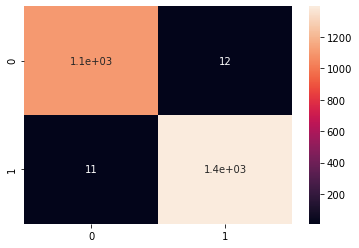

In [74]:
cm_dt= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_dt)
sns.heatmap(cm_dt, annot=True)

# MLP

In [75]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter = 7558, activation = 'relu')

In [76]:
mlp

MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=7558)

In [77]:
mlp = MLPClassifier(max_iter=1000, activation='relu')
mlp

MLPClassifier(max_iter=1000)

In [78]:
mlp = mlp.fit(x_train, y_train)

In [79]:
y_pred=mlp.predict(x_test)

In [80]:
y_pred

array(['anomaly', 'anomaly', 'normal', ..., 'normal', 'normal', 'normal'],
      dtype='<U7')

In [81]:
nb=mlp.score(x_test,y_test)
p=100
m2=nb*p
print("Accuracy: ",m2)

Accuracy:  95.03968253968253


In [82]:
score2 = accuracy_score(y_test, y_pred) * 100
print("Accuracy using MLP: ", round(score2, 1), "%" )

Accuracy using MLP:  95.0 %


In [83]:
mlp_error=np.mean(y_pred != y_test) # error rate
mlp_error

0.0496031746031746

In [84]:
print(confusion_matrix(y_test, y_pred))

[[1060   56]
 [  69 1335]]


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.94      0.95      0.94      1116
      normal       0.96      0.95      0.96      1404

    accuracy                           0.95      2520
   macro avg       0.95      0.95      0.95      2520
weighted avg       0.95      0.95      0.95      2520



Confusion Matrix:
 [[1060   56]
 [  69 1335]]


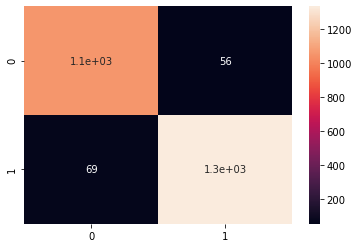

In [86]:
cm_mlp = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_mlp)
sns.heatmap(cm_mlp, annot=True)

# Nurel Network

In [87]:
nn = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter = 7558, activation = 'relu')

In [88]:
nn

MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=7558)

In [89]:
train, test = train_test_split(data, test_size = 0.1)
print(len(data))
print(len(train))
print(len(test))

25192
22672
2520


In [90]:
nn = nn.fit(x_train, y_train)

In [91]:
y_pred=Nb.predict(x_test)

In [92]:
#Diplay
y_pred

array(['normal', 'normal', 'normal', ..., 'normal', 'normal', 'normal'],
      dtype='<U7')

In [93]:
nb=nn.score(x_test,y_test)
p=100
m3=nb*p
print("Accuracy: ",m3)

Accuracy:  95.5952380952381


In [94]:
score3 = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Neural Net: ", round(score3, 1), "%" )

Accuracy using Neural Net:  59.0 %


In [95]:
nn_error=np.mean(y_pred != y_test) # error rate
nn_error

0.4103174603174603

In [96]:
print(confusion_matrix(y_test, y_pred))

[[ 114 1002]
 [  32 1372]]


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.78      0.10      0.18      1116
      normal       0.58      0.98      0.73      1404

    accuracy                           0.59      2520
   macro avg       0.68      0.54      0.45      2520
weighted avg       0.67      0.59      0.48      2520



Confusion Matrix:
 [[ 114 1002]
 [  32 1372]]


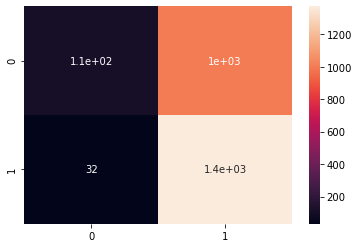

In [98]:
cm_nn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_nn)
sns.heatmap(cm_nn, annot=True)

# Random Forest

In [99]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)


In [100]:
RF = RF.fit(x_train, y_train)

In [101]:
y_pred = RF.predict(x_test)
y_pred

array(['anomaly', 'anomaly', 'normal', ..., 'normal', 'normal', 'normal'],
      dtype=object)

In [102]:
nb=RF.score(x_test,y_test)
p=100
m4=nb*p
print("Accuracy: ",m4)

Accuracy:  94.96031746031746


In [103]:
score4 = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Random Forest: ", round(score4, 1), "%" )

Accuracy using Random Forest:  95.0 %


In [104]:
RF_error=np.mean(y_pred != y_test) # error rate
RF_error

0.0503968253968254

In [105]:
print(confusion_matrix(y_test, y_pred))

[[1003  113]
 [  14 1390]]


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.99      0.90      0.94      1116
      normal       0.92      0.99      0.96      1404

    accuracy                           0.95      2520
   macro avg       0.96      0.94      0.95      2520
weighted avg       0.95      0.95      0.95      2520



Confusion Matrix:
 [[1003  113]
 [  14 1390]]


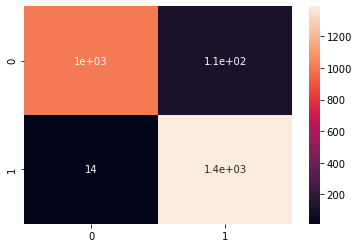

In [107]:
cm_RF = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_RF)
sns.heatmap(cm_RF, annot=True)

# Navie Bayes

In [108]:
%%time
Nb=GaussianNB()
Nb= Nb.fit(x_train,y_train)

Wall time: 48.9 ms


In [109]:
#%%time
y_pred=Nb.predict(x_test)

In [110]:
#Diplay
y_pred

array(['normal', 'normal', 'normal', ..., 'normal', 'normal', 'normal'],
      dtype='<U7')

In [111]:
nb=Nb.score(x_test,y_test)
p=100
m5=nb*p
print("Accuracy: ",m5)

Accuracy:  58.96825396825397


In [112]:
score5 = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Naive Bayes: ", round(score5, 1), "%" )

Accuracy using Naive Bayes:  59.0 %


In [113]:
Nb_error=np.mean(y_pred != y_test) # error rate
Nb_error

0.4103174603174603

In [114]:
print(confusion_matrix(y_test, y_pred))

[[ 114 1002]
 [  32 1372]]


In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.78      0.10      0.18      1116
      normal       0.58      0.98      0.73      1404

    accuracy                           0.59      2520
   macro avg       0.68      0.54      0.45      2520
weighted avg       0.67      0.59      0.48      2520



Confusion Matrix:
 [[ 114 1002]
 [  32 1372]]


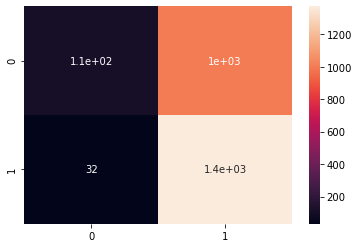

In [116]:
cm_Nb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_Nb)
sns.heatmap(cm_Nb, annot=True)

# KNeighborsClassifier

In [117]:
KN = KNeighborsClassifier()

In [118]:
%%time
KN = KN.fit(x_train, y_train)

Wall time: 409 ms


In [119]:
y_pred = KN.predict(x_test)
y_pred

array(['anomaly', 'anomaly', 'normal', ..., 'normal', 'normal', 'anomaly'],
      dtype=object)

In [120]:
nb=KN.score(x_test,y_test)
p=100
m6=nb*p
print("Accuracy: ",m6)

Accuracy:  99.0873015873016


In [121]:
KN_error=np.mean(y_pred != y_test)
KN_error

0.009126984126984128

In [122]:
score6 = accuracy_score(y_test, y_pred) * 100
print("Accuracy using KNeighborsClassifier: ", round(score6, 1), "%" )

Accuracy using KNeighborsClassifier:  99.1 %


In [123]:
print(confusion_matrix(y_test, y_pred))

[[1104   12]
 [  11 1393]]


In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      1116
      normal       0.99      0.99      0.99      1404

    accuracy                           0.99      2520
   macro avg       0.99      0.99      0.99      2520
weighted avg       0.99      0.99      0.99      2520



# SVM

# Another Part

In [561]:
classifiers = ["DT","MLP","NN","RF","Nb","KN"]
scores = [m1,m2,m3,m4,m5,m6]

In [562]:
Accuracy=pd.DataFrame(scores,classifiers)
Accuracy.columns=['Accuracy']

In [563]:
accu_err_data={
    'Algorithm':["DT","MLP","NN","RF","Nb","KN"],
    'Accuracy':[m1,m2,m3,m4,m5,m6],
    'Error_rate':[dt_error,mlp_error,nn_error,RF_error,Nb_error,KN_error]
}
df=pd.DataFrame(accu_err_data)

In [564]:
df

,Algorithm,Accuracy,Error_rate
0,DT,98.888889,0.011111
1,MLP,93.571429,0.064286
2,NN,95.992063,0.429365
3,RF,93.650794,0.063492
4,Nb,55.952381,0.440476
5,KN,98.888889,0.011111


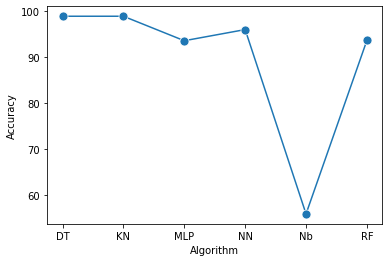

In [565]:
sns.lineplot(data=df, x="Algorithm", y="Accuracy",marker='o', markersize=9)

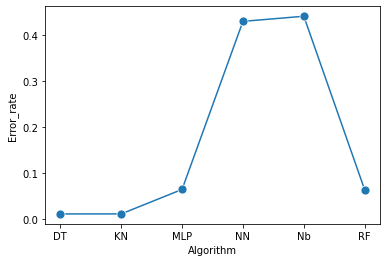

In [567]:
sns.lineplot(data=df, x="Algorithm", y="Error_rate",marker='o', markersize=9)

# Score

In [568]:
classifiers = ["DT","MLP","NN","RF","Nb","KN"]
scores = [score1,score2,score3,score4,score5,score6]

In [569]:
Accuracy=pd.DataFrame(scores,classifiers)
Accuracy.columns=['Accuracy']

In [570]:
accu_err_data={
    'Algorithm':["DT","MLP","NN","RF","Nb","KN"],
    'Accuracy':[score1,score2,score3,score4,score5,score6],
    'Error_rate':[dt_error,mlp_error,nn_error,RF_error,Nb_error,KN_error]
}
df=pd.DataFrame(accu_err_data)

In [571]:
df

,Algorithm,Accuracy,Error_rate
0,DT,98.888889,0.011111
1,MLP,93.571429,0.064286
2,NN,57.063492,0.429365
3,RF,93.650794,0.063492
4,Nb,55.952381,0.440476
5,KN,98.888889,0.011111


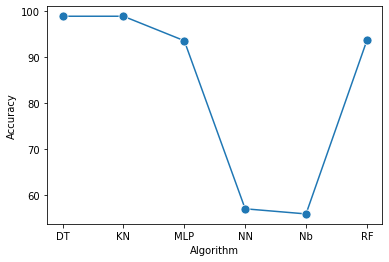

In [572]:
sns.lineplot(data=df, x="Algorithm", y="Accuracy",marker='o', markersize=9)

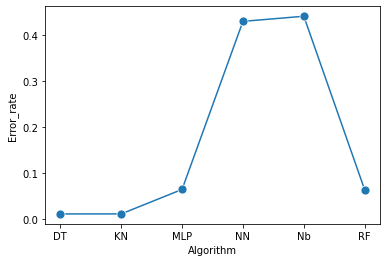

In [574]:
sns.lineplot(data=df, x="Algorithm", y="Error_rate",marker='o', markersize=9)